# Confronto tra insertion-sort e merge-sort
*Di Gesare Marco, matricola: 7049271*

## Introduzione
In questo notebook si vuole confrontare l'efficienza dei due algoritmi di ordinamento: insertion-sort e merge-sort.
L'obbiettivo è quello di confrontare i tempi di esecuzione dei due algoritmi al variare della dimensione dell'input. In questo modo sarà possibile affrontare un'analisi dei due algoritmi, comprendendo le differenze tra questultimi.
Inoltre si vuole confrontare l'efficienza dei due algoritmi al variare della distribuzione dei dati in input. In particolare si vuole confrontare l'efficienza dei due algoritmi al variare del grado di ordinamento dei dati in input.

# Cenni teorici
Il **problema dell'ordinamento** è un problema fondamentale nell'ambito dell'informatica e dell'algoritmo. L'obiettivo è organizzare un insieme di elementi in modo specifico, di solito in ordine crescente o decrescente. Formalmente, dato un insieme di *n* elementi (a<sub>0</sub>, a<sub>1</sub>, ..., a<sub>n</sub>), il problema dell'ordinamento richiede di produrre una permutazione (a'<sub>0</sub>, a'<sub>1</sub>, ..., a'<sub>n</sub>) tale che a'<sub>0</sub> <= a'<sub>1</sub> <= ... <= a'<sub>n</sub>.
In altre parole, gli elementi devono essere riorganizzati in modo tale che ciascun elemento sia maggiore o uguale al suo predecessore, seguendo un ordine crescente.

## Insertion-sort
Questo algoritmo è efficiente per ordinare un piccolo numero di dati. L'idea è quella di inserire un elemento alla volta nella posizione corretta. Inizia con un elemento, che è già ordinato, poi, ad ogni passo, un elemento viene preso dall'array in input e inserito nella posizione corretta nell'array ordinato; continuando fino a quando non arriva alla fine dell'array. L'algoritmo è in loco, non richiede spazio aggiuntivo per l'ordinamento. Inoltre è stabile, ovvero elementi con lo stesso valore rimangono nell'ordine in cui sono stati inseriti nell'array ordinato.
**Passi dell'algoritmo:**
1. Si considera il primo elemento dell'array come ordinato.
2. Si prende il secondo elemento e lo si inserisce nella posizione corretta rispetto al primo elemento.
3. Si prende il terzo elemento e lo si inserisce nella posizione corretta rispetto ai primi due elementi.
4. Si continua questo processo finché tutti gli elementi sono inseriti nella posizione corretta.

Il suo **costo computazionale** dipende dall'array che riceve in input:
1. Se l'array è già ordinato, l'algoritmo ha un costo lineare, ovvero O(n).
2. Se l'array è ordinato in ordine inverso, l'algoritmo ha un costo quadratico, ovvero O(n<sup>2</sup>).
3. Se l'array è ordinato in modo casuale, l'algoritmo ha un costo quadratico, ovvero O(n<sup>2</sup>).


In [33]:
def insertion_sort(array):
    for i in range(1, len(array)):
        key = array[i]
        j = i-1
        while j >= 0 and key < array[j]:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key
    return array

ex = [5, 2, 4, 6, 1, 3]
print(insertion_sort(ex))

[1, 2, 3, 4, 5, 6]


## Merge-sort

L'algoritmo di ordinamento Merge Sort è un algoritmo di ordinamento basato su un approccio *divide et impera*. La sua caratteristica principale è la divisione ricorsiva dell'array in sottoarray più piccoli fino a quando non rimangono più elementi da ordinare. Quindi, i sottoarray ordinati vengono uniti in modo da ottenere un array ordinato.
L'array viene diviso a metà e viene chiamata la funzione **merge_sort** per entrambe le metà. Successivamente, le due metà vengono unite utilizzando la funzione **merge**.
**Passi dell'algoritmo:**
1. Se l'array ha più di un elemento, divide l'array in due parti.
2. Chiama la funzione merge_sort per la prima metà.
3. Chiama la funzione merge_sort per la seconda metà.
4. Unisce le due metà ordinate in modo da ottenere un array ordinato.

Il suo **costo computazionale** è sempre O(n log n), indipendentemente dall'array che riceve in input. In particolare l'algortimo Merge ha un costo O(n), che viene moltiplicato per l'altezza dell'albero di ricorsione, ovvero log n.
Infine, si tratta di un algoritmo stabile, ovvero elementi con lo stesso valore rimangono nell'ordine in cui sono stati inseriti nell'array ordinato.

In [34]:
def merge_sort(array):
    if len(array) > 1:
        mid = len(array)//2
        left = array[:mid]
        right = array[mid:]
        merge_sort(left)
        merge_sort(right)
        merge(array, left, right)
    return array

def merge(array, left, right):
    i = j = k = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            array[k] = left[i]
            i += 1
        else:
            array[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        array[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        array[k] = right[j]
        j += 1
        k += 1

ex = [5, 2, 4, 6, 1, 3]
print(merge_sort(ex))

[1, 2, 3, 4, 5, 6]


# Test delle prestazioni
Per verificare le prestazioni descritte precedentemente occorre fare dei test, i quali saranno descritti
nei capitoli a seguire.
Librerie utilizzate:
1. **numpy**: per la generazione di array randomici
2. **matplotlib**: per la creazione di grafici
3. **timeit**: per il calcolo dei tempi di esecuzione
## Test Insertion-sort
Per questo algoritmo verranno affrontati tre tipi di test: con array già ordinato, con array randomico e con array ordinato in ordine inverso.
In questo modo sarà possibile confrontare i tempi di esecuzione al variare della distribuzione dei dati in input.
### Test con array ordinato
Si vuole eseguire un test fornendo in inputt un array già ordinato, così facendo sarà possibile verificare il comportamento dell'algoritmo nel caso migliore.
Nel codice sottostante viene generato un vettore *array* con una dimensione variabile, ma sempre costituito da elementi ordinati.
Inizialmente l'array è costituito da un solo elemento, per ogni iterazione la sua dimensione aumenta fino ad arrivare a una grandezza di 200 elementi.
Per ogni iterazione vengono calcolati i tempi di esecuzione dell'algoritmo e vengono salvati in un vettore *times*. Analogamente ssalva la dimensione dell'array in un vettore *elements*.
Questi due vettori vengono poi utilizzati per creare un grafico che mostra l'andamento dei tempi di esecuzione al variare della dimensione dell'array. Nel dettaglio, la funzione *avgTestOrdered* esegue 10 il test, in questo modo è possibile calcolare una media dei tempi di esecuzione.


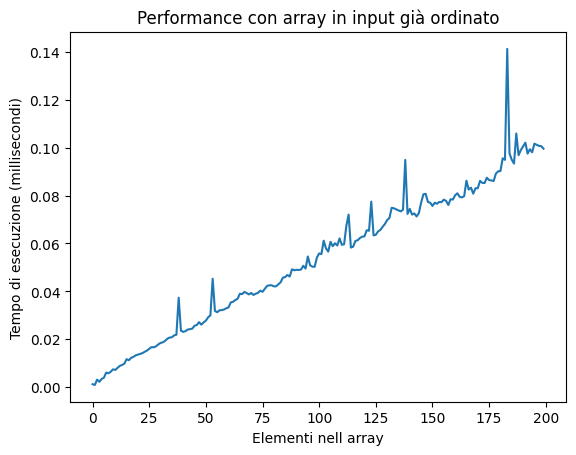

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer


def testOrderedArray():
    times = []
    elements = []
    for i in range(200):
        array = np.arange(i) #ordered array
        start = timer()
        insertion_sort(array)
        end = timer()
        time = (end - start) * 1000 #milliseconds
        times.append(time)
        elements.append(i)
    return times, elements

def avgTestOrdered():
    timesAdd = []
    elementsAdd = []
    avgTimesAdd = []
    avgElementsAdd = []

    # test add
    for i in range(10):
        time, element = testOrderedArray()
        timesAdd.append(time)
        elementsAdd.append(element)
    for i in range(len(timesAdd[0])):
        avgTimesAdd.append(0)
        avgElementsAdd.append(0)
        for j in range(len(timesAdd)):
            avgTimesAdd[i] += timesAdd[j][i]
            avgElementsAdd[i] += elementsAdd[j][i]
        avgTimesAdd[i] /= len(timesAdd)
        avgElementsAdd[i] /= len(timesAdd)
    plt.plot(avgElementsAdd, avgTimesAdd)
    plt.xlabel('Elementi nell array')
    plt.ylabel('Tempo di esecuzione (millisecondi)')
    plt.title('Performance con array in input già ordinato')
    plt.show()

avgTestOrdered()

### Test con array randomico
In questo test si crea un vettore *array* con una dimensione variabile, ma sempre costituito da elementi randomici, permettendo di fare un'analisi del caso medio dell'algoritmo.
Il codice è analogo al precedente, la differenza è nella generazione dell'array, che in questo caso è randomico.
Anche qui si crea una funzione *avgTestRandom* che esegue 10 volte il test, per calcolare una media dei tempi di esecuzione.

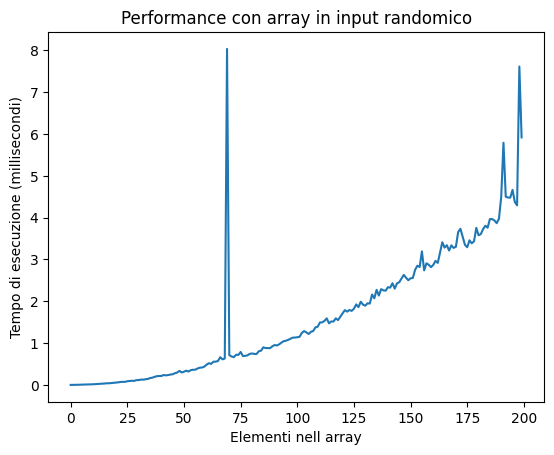

In [36]:
def testRandomArray():
    times = []
    elements = []
    for i in range(200):
        array = np.random.randint(1000, size=i) #random array
        start = timer()
        insertion_sort(array)
        end = timer()
        time = (end - start) * 1000 #milliseconds
        times.append(time)
        elements.append(i)
    return times, elements

def avgTestRandom():
    timesAdd = []
    elementsAdd = []
    avgTimesAdd = []
    avgElementsAdd = []

    # test add
    for i in range(10):
        time, element = testRandomArray()
        timesAdd.append(time)
        elementsAdd.append(element)
    for i in range(len(timesAdd[0])):
        avgTimesAdd.append(0)
        avgElementsAdd.append(0)
        for j in range(len(timesAdd)):
            avgTimesAdd[i] += timesAdd[j][i]
            avgElementsAdd[i] += elementsAdd[j][i]
        avgTimesAdd[i] /= len(timesAdd)
        avgElementsAdd[i] /= len(timesAdd)
    plt.plot(avgElementsAdd, avgTimesAdd)
    plt.xlabel('Elementi nell array')
    plt.ylabel('Tempo di esecuzione (millisecondi)')
    plt.title('Performance con array in input randomico')
    plt.show()

avgTestRandom()

### Test con array ordinato in ordine inverso
Il seguente test ha lo scopo di verificare il comportamento dell'algoritmo nel caso peggiore, ovvero quello in cui l'array è ordinato in ordine inverso.
Il codice è sostanizalmente identico a quello del primo test effettuato, è stata aggiunta una riga in più nella funzione *testReverseArray* che inverte l'array generato.
Per il resto la struttura rimane invariata rispetto agli altri test.

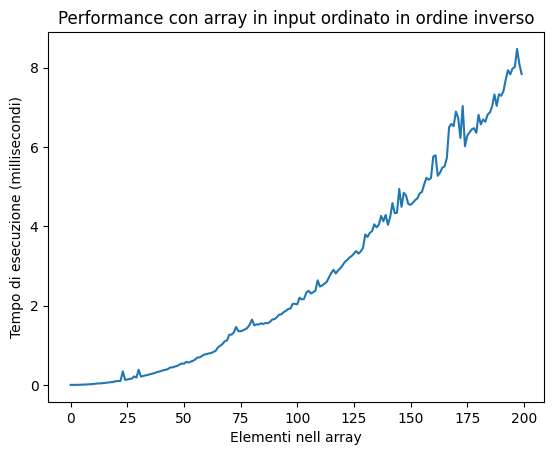

In [37]:
def testReverseArray():
    times = []
    elements = []
    for i in range(200):
        array = np.arange(i) #ordered array
        array = array[::-1] #reverse array
        start = timer()
        insertion_sort(array)
        end = timer()
        time = (end - start) * 1000 #milliseconds
        times.append(time)
        elements.append(i)
    return times, elements

def avgTestReverse():
    timesAdd = []
    elementsAdd = []
    avgTimesAdd = []
    avgElementsAdd = []

    # test add
    for i in range(10):
        time, element = testReverseArray()
        timesAdd.append(time)
        elementsAdd.append(element)
    for i in range(len(timesAdd[0])):
        avgTimesAdd.append(0)
        avgElementsAdd.append(0)
        for j in range(len(timesAdd)):
            avgTimesAdd[i] += timesAdd[j][i]
            avgElementsAdd[i] += elementsAdd[j][i]
        avgTimesAdd[i] /= len(timesAdd)
        avgElementsAdd[i] /= len(timesAdd)
    plt.plot(avgElementsAdd, avgTimesAdd)
    plt.xlabel('Elementi nell array')
    plt.ylabel('Tempo di esecuzione (millisecondi)')
    plt.title('Performance con array in input ordinato in ordine inverso')
    plt.show()

avgTestReverse()